**Simple Linear Regression - Scratch (Gradient Descent Basic Code)**

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, mean_absolute_error, explained_variance_score

**Code**

In [ ]:
class LinearRegressionGD:
    def __init__(self, regul=0):
        self.regul = regul
        self.W = None

    def fit(self, X, y, lr=0.01, num_iter=1000):
        # Input validation
        if len(X) != len(y) or len(X) == 0:
            raise ValueError("X and y must have the same length and cannot be empty")

        # Add bias term to X -> [1 X]
        X = np.hstack([np.ones((len(X), 1)), X])

        # Initialize W to zeros
        self.W = np.zeros(X.shape[1])

        # Use gradient descent to minimize cost function
        for i in range(num_iter):
            # Calculate predicted values
            y_pred = np.dot(X, self.W)

            # Calculate cost function
            cost = np.sum((y_pred - y) ** 2) + self.regul * np.sum(self.W ** 2)

            # Calculate gradients
            gradients = 2 * np.dot(X.T, (y_pred - y)) + 2 * self.regul * self.W

            # Update W
            self.W = self.W - lr * gradients

            if (i % 1000 == 0 ):
              print(cost)

    def predict(self, X):
        # Add bias term to X
        X = np.hstack([np.ones((len(X), 1)), X])

        # Calculate predicted values
        y_pred = np.dot(X, self.W)
        return y_pred

**Train**

In [ ]:
X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])

In [ ]:
lr = LinearRegressionGD(regul=0.1)
lr.fit(X, y, lr=0.01, num_iter=10000)

86.0
2.8791287270130335
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344
2.8791287270130344


In [ ]:
print(lr.W)

[1.99964292 0.65345474]


In [ ]:
# Print the slope and intercept
slope = lr.W[1]
intercept = lr.W[0]
print("Slope (W):", slope)
print("Intercept (b):", intercept)

Slope (W): 0.6534547402249611
Intercept (b): 1.9996429209069762


**Prediction**

In [ ]:
# Prediction on X data (Training Data)
y_pred = lr.predict(X)
print(y_pred)

[2.65309766 3.3065524  3.96000714 4.61346188 5.26691662]


In [ ]:
# Prediction for single data point
gyan = lr.predict(np.array([50]).reshape(-1, 1))
print(gyan)

[34.67237993]


**Visualize**

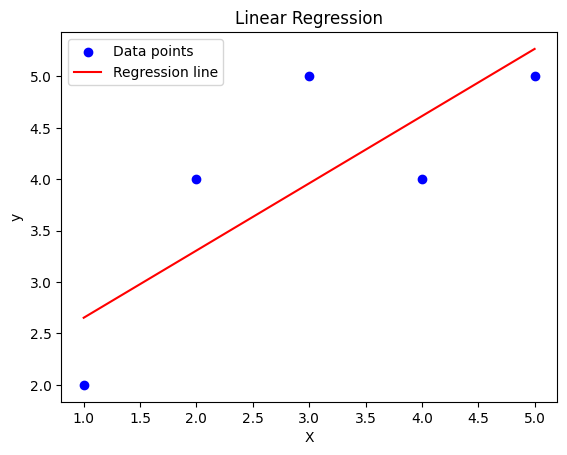

In [ ]:
# Plot the data and the linear regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()